In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x:'%.3f' % x)

sns.set_style('darkgrid')
sns.set(font_scale=1.3)

EDA

In [ ]:
df = pd.read_csv('data.csv')

df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
df.diagnosis.replace(['M', 'B'], [1, 0], inplace=True)

print(df.shape)
df.head()

(569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,1,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,1,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,1,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.000,0.373,0.484,0.000,0.000,0.000,1.000,1.000
radius_mean,569.000,14.127,3.524,6.981,11.700,13.370,15.780,28.110
texture_mean,569.000,19.290,4.301,9.710,16.170,18.840,21.800,39.280
perimeter_mean,569.000,91.969,24.299,43.790,75.170,86.240,104.100,188.500
area_mean,569.000,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
smoothness_mean,569.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
compactness_mean,569.000,0.104,0.053,0.019,0.065,0.093,0.130,0.345
concavity_mean,569.000,0.089,0.080,0.000,0.030,0.062,0.131,0.427
concave points_mean,569.000,0.049,0.039,0.000,0.020,0.034,0.074,0.201
symmetry_mean,569.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304


In [ ]:
df.isnull().sum().sum()

0

Text(0.5, 1.0, 'M=1  B=0')

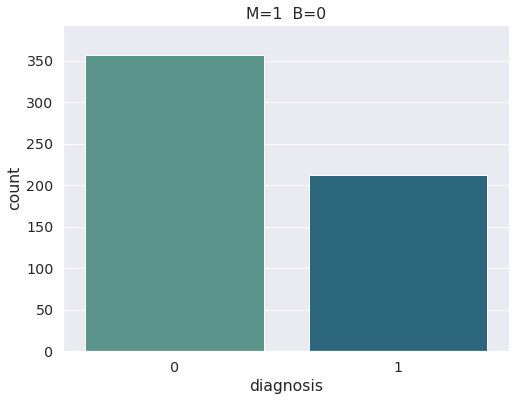

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(df.diagnosis, palette='crest')
ax.margins(y=0.1)
ax.set_title('M=1  B=0')

Correlation between attributes

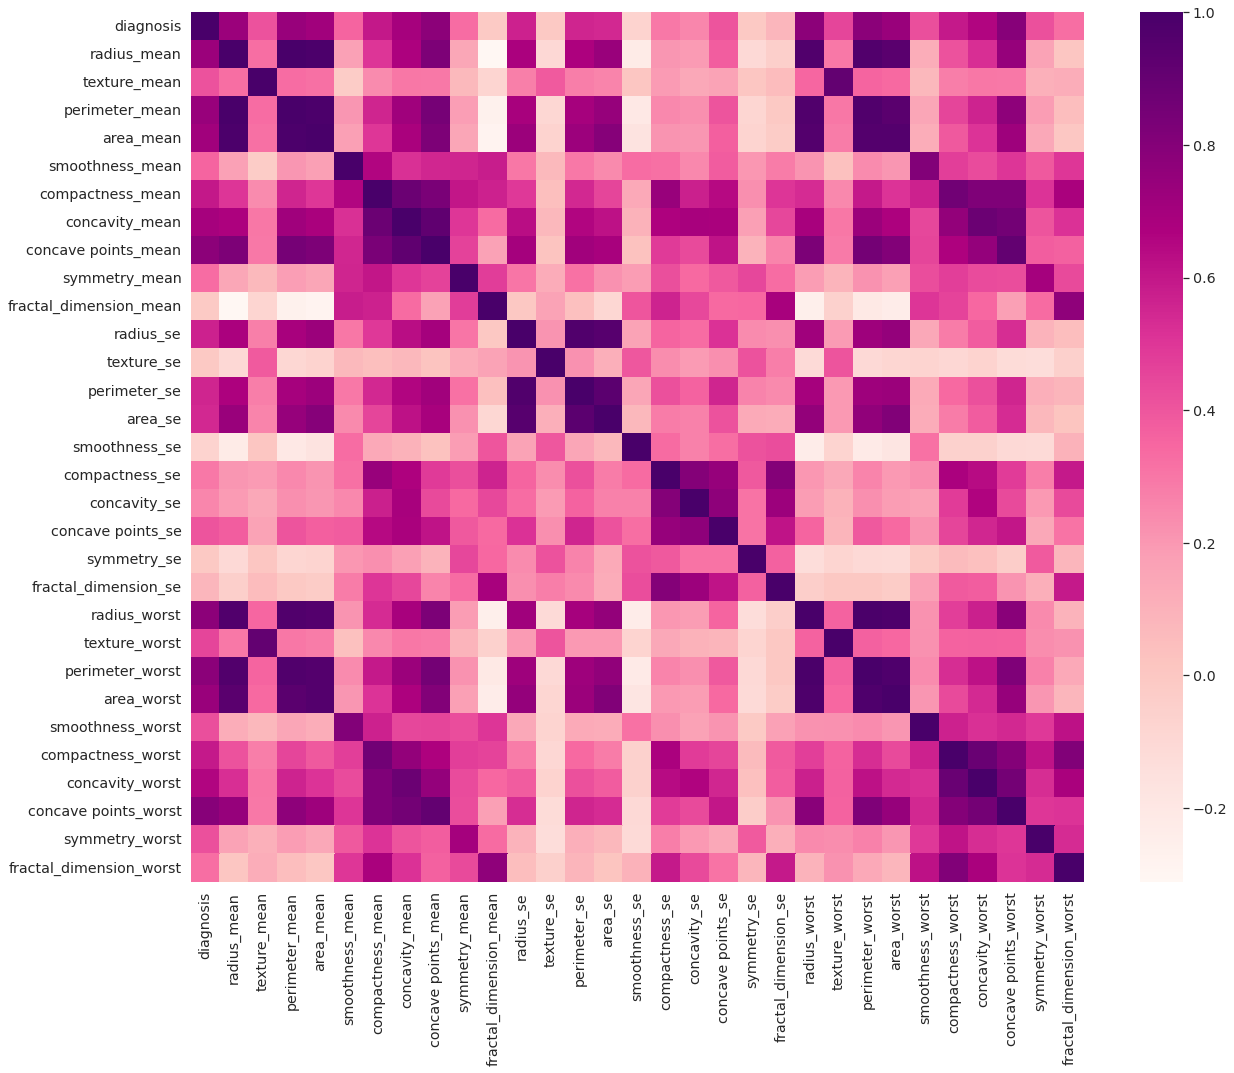

In [ ]:
plt.figure(figsize=(20, 16))

corr = df.corr()
sns.heatmap(corr, cmap='RdPu', fmt='.2f')

In [ ]:
# Find most important features relative to target
corr.sort_values(['diagnosis'], ascending=False, inplace=True)
corr.diagnosis[:25]

diagnosis                 1.000
concave points_worst      0.794
perimeter_worst           0.783
concave points_mean       0.777
radius_worst              0.776
perimeter_mean            0.743
area_worst                0.734
radius_mean               0.730
area_mean                 0.709
concavity_mean            0.696
concavity_worst           0.660
compactness_mean          0.597
compactness_worst         0.591
radius_se                 0.567
perimeter_se              0.556
area_se                   0.548
texture_worst             0.457
smoothness_worst          0.421
symmetry_worst            0.416
texture_mean              0.415
concave points_se         0.408
smoothness_mean           0.359
symmetry_mean             0.330
fractal_dimension_worst   0.324
compactness_se            0.293
Name: diagnosis, dtype: float64

In [ ]:
df.radius_se = np.log(df.radius_se + 1)
df.perimeter_se = np.log(df.perimeter_se + 1)
df.area_se = np.log(df.area_se)
df.concavity_se = np.log(df.concavity_se + 1)
df.fractal_dimension_se = np.log(df.fractal_dimension_se)

In [ ]:
z = np.abs(stats.zscore(df))

print(df.shape)

(569, 31)


In [ ]:
df = df[(z < 3).all(axis=1)]

print(df.shape)
df.head()

(496, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.434,0.734,1.481,4.305,0.005,0.013,0.018,0.013,0.014,-5.646,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,1,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.557,0.787,1.720,4.544,0.006,0.040,0.038,0.021,0.022,-5.388,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
4,1,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.564,0.781,1.862,4.548,0.011,0.025,0.055,0.019,0.018,-5.276,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077
5,1,12.450,15.700,82.570,477.100,0.128,0.170,0.158,0.081,0.209,0.076,0.289,0.890,1.168,3.303,0.008,0.033,0.036,0.011,0.022,-5.282,15.470,23.750,103.400,741.600,0.179,0.525,0.535,0.174,0.399,0.124
6,1,18.250,19.980,119.600,1040.000,0.095,0.109,0.113,0.074,0.179,0.057,0.369,0.773,1.430,3.987,0.004,0.014,0.022,0.010,0.014,-6.129,22.880,27.660,153.200,1606.000,0.144,0.258,0.378,0.193,0.306,0.084


Prediction

In [ ]:
y = df.diagnosis
X = df.drop('diagnosis', axis=1)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [ ]:
nca = NeighborhoodComponentsAnalysis(n_components=2, random_state=1)

nca.fit(x_scaled, y)
X_reduced = nca.transform(x_scaled)

train_X, test_X, train_y, test_y = train_test_split(X_reduced, y, test_size=0.2, random_state=1)

In [33]:
from sklearn.linear_model import LogisticRegression

logisitic_model = LogisticRegression(solver='liblinear', C=3.0, random_state=0)
logisitic_model.fit(train_X, train_y)
prediction1 = logisitic_model.predict(test_X)
print(classification_report(test_y, prediction1))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        75
           1       0.86      0.96      0.91        25

    accuracy                           0.95       100
   macro avg       0.92      0.95      0.94       100
weighted avg       0.95      0.95      0.95       100



In [34]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(train_X, train_y)
prediction2 = svm_model.predict(test_X)
print(classification_report(test_y, prediction2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.92      0.96        25

    accuracy                           0.98       100
   macro avg       0.99      0.96      0.97       100
weighted avg       0.98      0.98      0.98       100



In [ ]:
import pickle
filename1 = 'logisitic_model.sav'
pickle.dump(logisitic_model, open(filename1, 'wb'))

filename2 = 'svm_model.sav'
pickle.dump(svm_model, open(filename2, 'wb'))

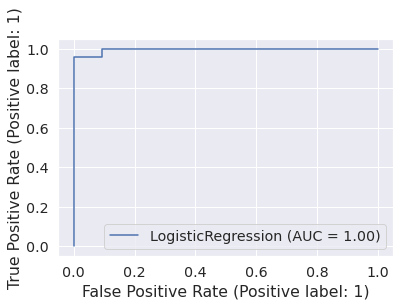

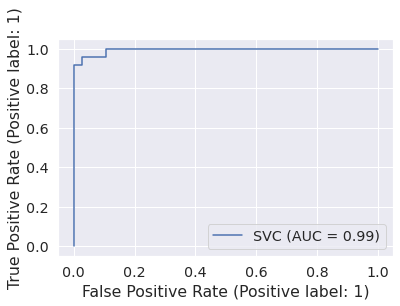

In [ ]:
plot_roc_curve(logisitic_model, test_X, test_y)
plot_roc_curve(svm_model, test_X, test_y)